# 📝 Celda 1 — Descarga y primer vistazo (tu celda)

Markdown (explicativa)
Esta celda crea la carpeta ../data, define los tickers de BBVA y Santander, descarga los datos históricos (2000–2025) desde Yahoo Finance con yfinance, imprime un vistazo rápido (head) y guarda los CSV crudos. Finalmente dibuja una comparación del precio de cierre de ambos activos.

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


BBVA Data:
Price      Adj Close      Close Dividends       High        Low       Open  \
Ticker       BBVA.MC    BBVA.MC   BBVA.MC    BBVA.MC    BBVA.MC    BBVA.MC   
Date                                                                         
2000-01-03  4.040035  13.623349       0.0  13.757854  13.594527  13.690602   
2000-01-04  3.934618  13.267874       0.0  13.536882  13.219837  13.450416   
2000-01-05  3.846296  12.970044       0.0  13.210230  12.912399  13.142977   
2000-01-06  3.846296  12.970044       0.0  12.970044  12.970044  12.970044   
2000-01-07  3.894731  13.133370       0.0  13.248659  12.998866  13.248659   

Price      Stock Splits    Volume  
Ticker          BBVA.MC   BBVA.MC  
Date                               
2000-01-03          0.0   8244257  
2000-01-04          0.0   8522096  
2000-01-05          0.0  12159826  
2000-01-06          0.0         0  
2000-01-07          0.0  62261944   

SANTANDER Data:
Price      Adj Close     Close Dividends      High       L

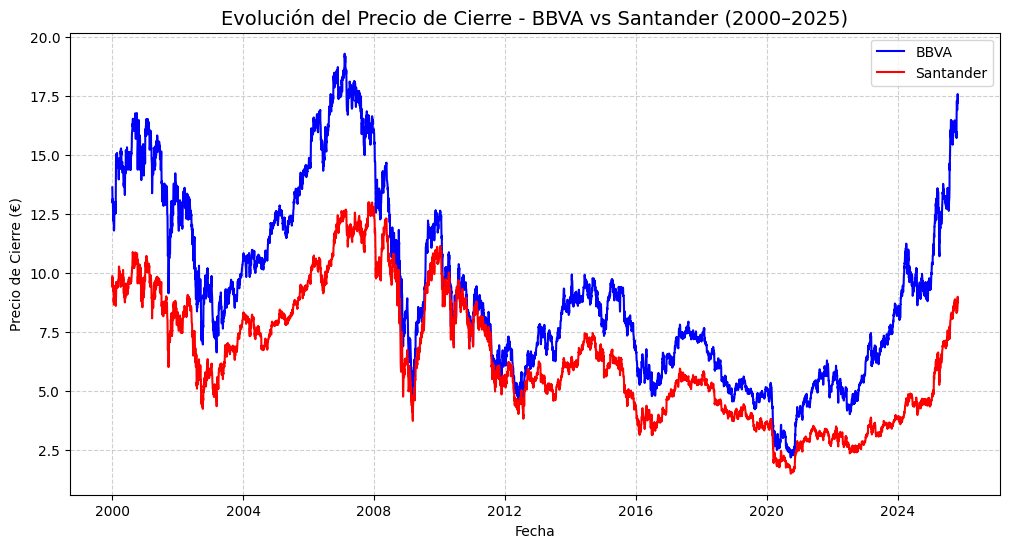

In [9]:
import yfinance as yf
import pandas as pd
import os

# ===========================================
# 1️⃣ Crear carpeta 'data' si no existe
# ===========================================
os.makedirs("../data", exist_ok=True)

# ===========================================
# 2️⃣ Definir símbolos y rango de fechas
# ===========================================
bbva_ticker = "BBVA.MC"       # Acción BBVA
santander_ticker = "SAN.MC"   # Acción Santander

start_date = "2000-01-01"
end_date = "2025-10-31"

# ===========================================
# 3️⃣ Descargar datos desde Yahoo Finance
# ===========================================
bbva_data = yf.download(bbva_ticker, start=start_date, end=end_date, auto_adjust=False, actions=True)
santander_data = yf.download(santander_ticker, start=start_date, end=end_date, auto_adjust=False, actions=True)

# Mostrar una vista rápida
print("BBVA Data:")
print(bbva_data.head(), "\n")
print("SANTANDER Data:")
print(santander_data.head(), "\n")

# ===========================================
# 4️⃣ Guardar los datos en carpeta /data
# ===========================================
bbva_data.to_csv("../data/BBVA.csv", index=True)
santander_data.to_csv("../data/SANTANDER.csv", index=True)

print("✅ Archivos guardados correctamente en la carpeta /data")

# ===========================================
# 5️⃣ Visualizar precios de cierre
# ===========================================
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(bbva_data.index, bbva_data['Close'], label='BBVA', color='blue')
plt.plot(santander_data.index, santander_data['Close'], label='Santander', color='red')
plt.title('Evolución del Precio de Cierre - BBVA vs Santander (2000–2025)', fontsize=14)
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre (€)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


# 📝 Celda 2 — Comprobaciones básicas de integridad

Markdown (explicativa)
Validamos lo descargado: rango de fechas, número de filas, columnas presentes, duplicados y valores nulos. Esto no transforma nada; solo diagnóstico para garantizar que los CSV crudos son coherentes.

In [10]:
import numpy as np

def quick_summary(df, name):
    print(f"── {name} ──")
    print("Rango fechas:", df.index.min(), "→", df.index.max())
    print("Filas:", len(df), "| Columnas:", list(df.columns))
    print("Duplicados en índice:", df.index.duplicated().sum())
    print("Nulos por columna:\n", df.isna().sum())
    print("-"*60)

quick_summary(bbva_data, "BBVA")
quick_summary(santander_data, "Santander")


── BBVA ──
Rango fechas: 2000-01-03 00:00:00 → 2025-10-30 00:00:00
Filas: 6634 | Columnas: [('Adj Close', 'BBVA.MC'), ('Close', 'BBVA.MC'), ('Dividends', 'BBVA.MC'), ('High', 'BBVA.MC'), ('Low', 'BBVA.MC'), ('Open', 'BBVA.MC'), ('Stock Splits', 'BBVA.MC'), ('Volume', 'BBVA.MC')]
Duplicados en índice: 0
Nulos por columna:
 Price         Ticker 
Adj Close     BBVA.MC    0
Close         BBVA.MC    0
Dividends     BBVA.MC    0
High          BBVA.MC    0
Low           BBVA.MC    0
Open          BBVA.MC    0
Stock Splits  BBVA.MC    0
Volume        BBVA.MC    0
dtype: int64
------------------------------------------------------------
── Santander ──
Rango fechas: 2000-01-03 00:00:00 → 2025-10-30 00:00:00
Filas: 6634 | Columnas: [('Adj Close', 'SAN.MC'), ('Close', 'SAN.MC'), ('Dividends', 'SAN.MC'), ('High', 'SAN.MC'), ('Low', 'SAN.MC'), ('Open', 'SAN.MC'), ('Stock Splits', 'SAN.MC'), ('Volume', 'SAN.MC')]
Duplicados en índice: 0
Nulos por columna:
 Price         Ticker
Adj Close     SAN.MC  

# 📝 Celda 3 — Alineación temporal de índices (solo diagnóstico)

Markdown (explicativa)
Las series de acciones pueden tener días sin cotización (festivos, etc.). Aquí comparamos los calendarios de ambos activos:

- Cuántas fechas están en BBVA y no en Santander (y viceversa).

- Solo informamos; el alineado real lo haremos en el Cuaderno 2 para no tocar los datos crudos.

In [11]:
bbva_dates = set(pd.to_datetime(bbva_data.index))
san_dates  = set(pd.to_datetime(santander_data.index))

only_bbva = sorted(list(bbva_dates - san_dates))[:10]
only_san  = sorted(list(san_dates - bbva_dates))[:10]

print(f"Fechas únicas en BBVA (muestra 10): {only_bbva}")
print(f"Fechas únicas en SAN  (muestra 10): {only_san}")
print("Total fechas BBVA:", len(bbva_dates), "| Total fechas SAN:", len(san_dates))
print("Intersección:", len(bbva_dates & san_dates))


Fechas únicas en BBVA (muestra 10): []
Fechas únicas en SAN  (muestra 10): []
Total fechas BBVA: 6634 | Total fechas SAN: 6634
Intersección: 6634


# 📝 Celda 4 — Descriptivos rápidos (OHLCV)

Markdown (explicativa)
Sacamos estadísticos simples para entender el rango y la escala de precios/volúmenes. Útil para detectar outliers obvios antes del preprocesado.

In [12]:
with pd.option_context('display.float_format', '{:,.4f}'.format):
    print("=== BBVA: describe() ===")
    display(bbva_data.describe(include='all'))
    print("\n=== SANTANDER: describe() ===")
    display(santander_data.describe(include='all'))


=== BBVA: describe() ===


Price,Adj Close,Close,Dividends,High,Low,Open,Stock Splits,Volume
Ticker,BBVA.MC,BBVA.MC,BBVA.MC,BBVA.MC,BBVA.MC,BBVA.MC,BBVA.MC,BBVA.MC
count,"6,634.0000","6,634.0000","6,634.0000","6,634.0000","6,634.0000","6,634.0000","6,634.0000","6,634.0000"
mean,4.6342,9.2914,0.0015,9.3991,9.1714,9.2897,0.0000,"37,389,825.0978"
std,2.0994,3.8379,0.0155,3.8606,3.8080,3.8346,0.0000,"38,639,622.0170"
min,1.6166,2.1600,0.0000,2.2260,2.1280,2.1500,0.0000,0.0000
25%,3.4544,6.2541,0.0000,6.3422,6.1342,6.2556,0.0000,"16,035,818.5000"
50%,4.1713,8.6826,0.0000,8.8290,8.5794,8.6851,0.0000,"26,716,752.0000"
75%,5.0041,12.1054,0.0000,12.2435,12.0093,12.1150,0.0000,"44,774,218.0000"
max,17.2593,19.2917,0.4100,19.4839,19.1668,19.2917,0.0000,"600,901,855.0000"



=== SANTANDER: describe() ===


Price,Adj Close,Close,Dividends,High,Low,Open,Stock Splits,Volume
Ticker,SAN.MC,SAN.MC,SAN.MC,SAN.MC,SAN.MC,SAN.MC,SAN.MC,SAN.MC
count,"6,634.0000","6,634.0000","6,634.0000","6,634.0000","6,634.0000","6,634.0000","6,634.0000","6,634.0000"
mean,3.2212,6.4307,0.0013,6.5092,6.3446,6.4310,0.0003,"73,208,828.6951"
std,1.0481,2.6812,0.0121,2.7027,2.6533,2.6797,0.0179,"65,725,796.7422"
min,1.2339,1.4735,0.0000,1.5025,1.4394,1.4440,0.0000,0.0000
25%,2.5255,4.1997,0.0000,4.2590,4.1481,4.2134,0.0000,"34,049,668.0000"
50%,3.0446,6.0037,0.0000,6.0845,5.9027,6.0042,0.0000,"55,878,959.0000"
75%,3.8766,8.4127,0.0000,8.5252,8.2893,8.4213,0.0000,"89,522,226.7500"
max,8.8650,12.9825,0.2440,13.1816,12.9133,12.9825,1.0435,"948,768,587.0000"


# 📝 Celda 5 — Comparativa Close vs Adj Close (diagnóstico de ajustes)

Markdown (explicativa)
Comparamos Close y Adj Close para ver si hay diferencias relevantes por dividendos / splits. Esto te ayuda a decidir si más adelante trabajar con Close o Adj Close. (En el TFG se conserva Close y se documenta el criterio).

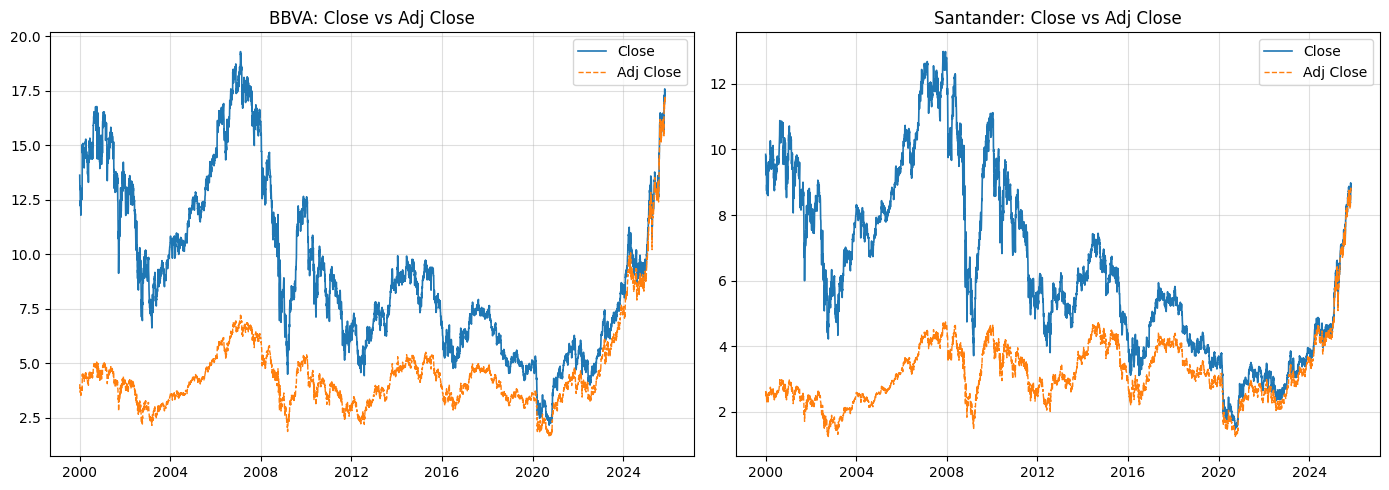

In [16]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(14,5), sharex=False)

axes[0].plot(bbva_data.index, bbva_data['Close'], label='Close', linewidth=1.2)
axes[0].plot(bbva_data.index, bbva_data['Adj Close'], label='Adj Close', linewidth=1.0, linestyle='--')
axes[0].set_title("BBVA: Close vs Adj Close")
axes[0].grid(alpha=0.4)
axes[0].legend()

axes[1].plot(santander_data.index, santander_data['Close'], label='Close', linewidth=1.2)
if 'Adj Close' in santander_data.columns:
    axes[1].plot(santander_data.index, santander_data['Adj Close'], label='Adj Close', linewidth=1.0, linestyle='--')
axes[1].set_title("Santander: Close vs Adj Close")
axes[1].grid(alpha=0.4)
axes[1].legend()

plt.tight_layout()
plt.show()


# 📝 Celda 6 — Chequeo de huecos y continuidad temporal

Markdown (explicativa)
Contamos saltos de calendario (días hábiles sin registro) para cada serie. No rellenamos huecos aquí; solo lo reportamos. El relleno/alineación (si procede) se hará en el Cuaderno 2 antes del escalado e indicadores.

In [14]:
def business_day_gaps(df):
    # Reindex a días hábiles solo para contar (no persistimos)
    bdays = pd.bdate_range(start=df.index.min(), end=df.index.max())
    missing = bdays.difference(df.index)
    return len(missing), missing[:10]

bbva_gaps_count, bbva_gaps_sample = business_day_gaps(bbva_data)
san_gaps_count, san_gaps_sample   = business_day_gaps(santander_data)

print(f"BBVA: días hábiles faltantes = {bbva_gaps_count} | muestra 10 → {list(bbva_gaps_sample)}")
print(f"SAN : días hábiles faltantes = {san_gaps_count} | muestra 10 → {list(san_gaps_sample)}")


BBVA: días hábiles faltantes = 105 | muestra 10 → [Timestamp('2006-04-14 00:00:00'), Timestamp('2006-04-17 00:00:00'), Timestamp('2006-05-01 00:00:00'), Timestamp('2006-12-25 00:00:00'), Timestamp('2006-12-26 00:00:00'), Timestamp('2007-04-06 00:00:00'), Timestamp('2007-04-09 00:00:00'), Timestamp('2007-05-01 00:00:00'), Timestamp('2007-12-25 00:00:00'), Timestamp('2007-12-26 00:00:00')]
SAN : días hábiles faltantes = 105 | muestra 10 → [Timestamp('2006-04-14 00:00:00'), Timestamp('2006-04-17 00:00:00'), Timestamp('2006-05-01 00:00:00'), Timestamp('2006-12-25 00:00:00'), Timestamp('2006-12-26 00:00:00'), Timestamp('2007-04-06 00:00:00'), Timestamp('2007-04-09 00:00:00'), Timestamp('2007-05-01 00:00:00'), Timestamp('2007-12-25 00:00:00'), Timestamp('2007-12-26 00:00:00')]


# 📝 Celda 7 — Resumen para el informe + metadatos del dataset crudo

Markdown (explicativa)
Generamos un resumen tabular con información clave (rango temporal, filas, nulos) y guardamos un JSON de metadatos para trazar la procedencia y el estado del dataset crudo (buena práctica de replicabilidad que luego citamos en el README).

In [15]:
# === Celda 7 (reemplazo): Resumen y metadatos del dataset crudo (versión segura JSON) ===
import json
from pathlib import Path
import numpy as np
import pandas as pd

def to_py(obj):
    """
    Convierte numpy types y Timestamps a tipos Python básicos.
    También convierte tuplas a strings cuando se usan como claves.
    """
    if isinstance(obj, (np.integer,)):
        return int(obj)
    if isinstance(obj, (np.floating,)):
        return float(obj)
    if isinstance(obj, (np.bool_,)):
        return bool(obj)
    if hasattr(obj, "isoformat"):  # pandas.Timestamp / datetime
        try:
            return obj.isoformat()
        except Exception:
            return str(obj)
    return obj

def dataset_meta(df, name:str):
    # Aseguramos columnas como strings (por si vinieran como tuplas/MultiIndex)
    cols_str = [str(c) for c in df.columns]

    # Nulos con claves de columna en string
    nulls = {}
    for c in df.columns:
        key = str(c)
        val = int(df[c].isna().sum())
        nulls[key] = val

    start = df.index.min() if len(df) > 0 else None
    end   = df.index.max() if len(df) > 0 else None

    return {
        "name": str(name),
        "start": str(to_py(start)) if start is not None else None,
        "end":   str(to_py(end))   if end   is not None else None,
        "rows": int(len(df)),
        "columns": cols_str,
        "nulls": nulls
    }

meta = {
    "bbva": dataset_meta(bbva_data, "BBVA.MC"),
    "santander": dataset_meta(santander_data, "SAN.MC"),
    "download_params": {
        "start_date": str(start_date),
        "end_date": str(end_date),
        "auto_adjust_bbva": False,
        "actions_bbva": True,
        "auto_adjust_san": "default(yfinance)",
        "actions_san": "default(yfinance)"
    }
}

Path("../data").mkdir(parents=True, exist_ok=True)
with open("../data/_raw_metadata.json", "w", encoding="utf-8") as f:
    json.dump(meta, f, indent=2, ensure_ascii=False)

print("📝 Metadatos guardados en ../data/_raw_metadata.json")
pd.DataFrame([meta["bbva"], meta["santander"]])


📝 Metadatos guardados en ../data/_raw_metadata.json


,name,start,end,rows,columns,nulls
0,BBVA.MC,2000-01-03T00:00:00,2025-10-30T00:00:00,6634,"[('Adj Close', 'BBVA.MC'), ('Close', 'BBVA.MC'...","{'('Adj Close', 'BBVA.MC')': 0, '('Close', 'BB..."
1,SAN.MC,2000-01-03T00:00:00,2025-10-30T00:00:00,6634,"[('Adj Close', 'SAN.MC'), ('Close', 'SAN.MC'),...","{'('Adj Close', 'SAN.MC')': 0, '('Close', 'SAN..."


## Conclusión del Cuaderno 1

Estado al finalizar el cuaderno 1 (Descarga):

✅ Datos de BBVA y Santander descargados y guardados en ../data/BBVA.csv y ../data/SANTANDER.csv.

✅ Comprobaciones de integridad realizadas (nulos, duplicados, rangos, continuidad temporal, Close vs Adj Close).

📝 Metadatos guardados en ../data/_raw_metadata.json.

Siguiente paso (Cuaderno 2):

Cargar estos CSV crudos, limpieza mínima, alineación temporal si procede, escalado MinMax y cálculo de indicadores técnicos (SMA/EMA/RSI/σ/ATR) tal y como dicta el TFG.

Guardar dataset procesado en ../data/processed/.